In [1]:
import re
import pandas as pd


In [2]:
f = open("WhatsApp Chat with Sigma gang.txt", "r", encoding="utf8")

In [3]:
data = f.read()

In [4]:
print(data)

22/02/2020, 1:23 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
22/02/2020, 1:23 am - You created group "SSG"
22/02/2020, 1:25 am - Shery: <Media omitted>
22/02/2020, 1:28 am - Daenerys Targaryan changed this group's icon
22/02/2020, 1:28 am - Daenerys Targaryan changed this group's icon
22/02/2020, 1:29 am - Daenerys Targaryan changed this group's icon
22/02/2020, 1:29 am - Shery: <Media omitted>
22/02/2020, 1:29 am - Shery: <Media omitted>
22/02/2020, 1:30 am - You changed this group's icon
22/02/2020, 1:31 am - Daenerys Targaryan changed this group's icon
22/02/2020, 1:31 am - Daenerys Targaryan changed this group's icon
22/02/2020, 1:32 am - You changed this group's icon
22/02/2020, 1:32 am - You changed this group's icon
22/02/2020, 1:33 am - You changed this group's icon
22/02/2020, 1:34 am - SMA Nomi: Hello
22/02/2020, 1:34 am - SMA Nomi: Hehe
22/02/2020, 1:35 am - Shery changed thi

In [5]:
pattern = '[0-9]+/[0-9]+/[0-9]+,\s[0-9]+:[0-9]+\s[A-Za-z]m\s-\s'

In [6]:
messages = re.split(pattern, data)  
messages.pop(0)
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'You created group "SSG"\n',
 'Shery: <Media omitted>\n',
 "Daenerys Targaryan changed this group's icon\n",
 "Daenerys Targaryan changed this group's icon\n",
 "Daenerys Targaryan changed this group's icon\n",
 'Shery: <Media omitted>\n',
 'Shery: <Media omitted>\n',
 "You changed this group's icon\n",
 "Daenerys Targaryan changed this group's icon\n",
 "Daenerys Targaryan changed this group's icon\n",
 "You changed this group's icon\n",
 "You changed this group's icon\n",
 "You changed this group's icon\n",
 'SMA Nomi: Hello\n',
 'SMA Nomi: Hehe\n',
 "Shery changed this group's icon\n",
 "You changed this group's icon\n",
 'Shery: <Media omitted>\n',
 'Shery: <Media omitted>\n',
 'Shery: <Media omitted>\n',
 "You changed this group's icon\n",
 "Shery changed this group's icon\n",
 "You changed this group's icon\n",
 'Ahmad Noob left\n',
 '

In [7]:
dates = re.findall(pattern, data)  
dates

['22/02/2020, 1:23\u202fam - ',
 '22/02/2020, 1:23\u202fam - ',
 '22/02/2020, 1:25\u202fam - ',
 '22/02/2020, 1:28\u202fam - ',
 '22/02/2020, 1:28\u202fam - ',
 '22/02/2020, 1:29\u202fam - ',
 '22/02/2020, 1:29\u202fam - ',
 '22/02/2020, 1:29\u202fam - ',
 '22/02/2020, 1:30\u202fam - ',
 '22/02/2020, 1:31\u202fam - ',
 '22/02/2020, 1:31\u202fam - ',
 '22/02/2020, 1:32\u202fam - ',
 '22/02/2020, 1:32\u202fam - ',
 '22/02/2020, 1:33\u202fam - ',
 '22/02/2020, 1:34\u202fam - ',
 '22/02/2020, 1:34\u202fam - ',
 '22/02/2020, 1:35\u202fam - ',
 '22/02/2020, 1:37\u202fam - ',
 '22/02/2020, 1:38\u202fam - ',
 '22/02/2020, 1:39\u202fam - ',
 '22/02/2020, 1:39\u202fam - ',
 '22/02/2020, 1:39\u202fam - ',
 '22/02/2020, 1:40\u202fam - ',
 '22/02/2020, 1:41\u202fam - ',
 '22/02/2020, 11:31\u202fam - ',
 '23/02/2020, 1:41\u202fam - ',
 '26/02/2020, 5:49\u202fpm - ',
 '26/02/2020, 5:59\u202fpm - ',
 '10/03/2020, 11:13\u202fam - ',
 '13/03/2020, 6:03\u202fpm - ',
 '13/03/2020, 6:04\u202fpm - ',
 '13/0

In [8]:
df = pd.DataFrame({'message_date': dates, 'user_message': messages})
df.head()

,message_date,user_message
0,"22/02/2020, 1:23 am -",Messages and calls are end-to-end encrypted. N...
1,"22/02/2020, 1:23 am -","You created group ""SSG""\n"
2,"22/02/2020, 1:25 am -",Shery: <Media omitted>\n
3,"22/02/2020, 1:28 am -",Daenerys Targaryan changed this group's icon\n
4,"22/02/2020, 1:28 am -",Daenerys Targaryan changed this group's icon\n


In [9]:
df.message_date[0]

'22/02/2020, 1:23\u202fam - '

In [10]:
def split_datetime(datetime_string):
      date, time = datetime_string.split(',')
      day, month, year = date.split('/')
      hour, minute = time.split(':')
      if 'am' in minute:
            ampm = 'am'
            minute = minute.replace('am - ', '')
      else:
            ampm = 'pm'
            minute = minute.replace('pm - ', '')
      
      return day, month, year, hour, minute, ampm

In [11]:
day_list = []
month_list = []
year_list = []
hour_list = []
minute_list = []
ampm_list = []
for datestring in df['message_date']:
      day, month, year, hour, minute,ampm = split_datetime(datestring)
      day_list.append(day)
      month_list.append(month)
      year_list.append(year)
      hour_list.append(hour)
      minute_list.append(minute)
      ampm_list.append(ampm)

df['day'] = day_list
df['month'] = month_list
df['year'] = year_list
df['hour'] = hour_list
df['minute'] = minute_list
df['ampm'] = ampm_list

df['hour'] = df['hour'] + " " + df['ampm']

df.drop(columns=['message_date', 'ampm'], inplace=True)

df.head()

      

,user_message,day,month,year,hour,minute
0,Messages and calls are end-to-end encrypted. N...,22,02,2020,1 am,23
1,"You created group ""SSG""\n",22,02,2020,1 am,23
2,Shery: <Media omitted>\n,22,02,2020,1 am,25
3,Daenerys Targaryan changed this group's icon\n,22,02,2020,1 am,28
4,Daenerys Targaryan changed this group's icon\n,22,02,2020,1 am,28


In [12]:
def split_name(message_string):
      if ":" in message_string:
            name, message = message_string.split(':', 1)
      else:
            name = "system_notification"
            message = message_string
      
      return name, message

In [13]:
name_list = []
message_list = []
for name_message in df['user_message']:
      name, message = split_name(name_message)
      name_list.append(name)
      message_list.append(message)

df['user_name'] = name_list
df['message'] = message_list

df.drop(columns=['user_message'], inplace=True)

df

,day,month,year,hour,minute,user_name,message
0,22,02,2020,1 am,23,system_notification,Messages and calls are end-to-end encrypted. N...
1,22,02,2020,1 am,23,system_notification,"You created group ""SSG""\n"
2,22,02,2020,1 am,25,Shery,<Media omitted>\n
3,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n
4,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n
...,...,...,...,...,...,...,...
7152,01,11,2023,8 pm,46,Ahmad Noob,<Media omitted>\n
7153,01,11,2023,8 pm,50,Muhammad Ali Ijaz,F\n
7154,02,11,2023,12 pm,06,Shery,<Media omitted>\n
7155,02,11,2023,1 pm,57,Muhammad Ali Ijaz,Nice\n


In [14]:
num_media= 0
for message in df['message']:
    if "<Media omitted>" in message:
        num_media += 1

num_media

2833

In [15]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Text with URLs: stackoverflow.com.")

In [16]:
urls  =0
for message in df['message']:
    if extractor.find_urls(message):
        urls += 1

urls
    

130

In [17]:
x = df['user_name'].value_counts().head()

In [18]:
import matplotlib.pyplot as plt

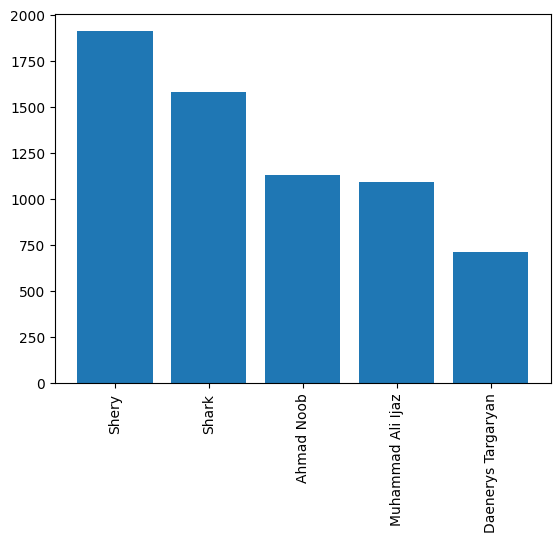

In [19]:
name = (x.index)
count = (x.values)
plt.bar(name, count)
plt.xticks(rotation=90)
plt.show()

In [20]:
round((df['user_name'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'user_name':'name', 'count':'percent'}) 

,name,percent
0,Shery,26.70
1,Shark,22.09
2,Ahmad Noob,15.80
3,Muhammad Ali Ijaz,15.24
4,Daenerys Targaryan,9.99
5,SMA Nomi,9.10
6,system_notification,1.08


In [21]:
temp = df[df['user_name'] != 'system_notification']


In [22]:
f = open("stopwords.txt", "r")
stopwords = f.read()

In [23]:
for message in temp['message']:
    string_unicode = message
    string_unicode = string_unicode.encode("ascii", "ignore")
    string_unicode = string_unicode.decode()
    

In [24]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.append(word)

In [25]:
from collections import Counter

In [26]:
Counter(words).most_common(20)

[('\u200b', 1930),
 ('ok', 116),
 ('nahi', 115),
 ('dani', 81),
 ('kia', 77),
 ('yaar', 67),
 ('bhai', 62),
 ('mubarak', 55),
 ('bahi', 54),
 ('yar', 50),
 ('hai?', 50),
 ('done', 49),
 ('guys', 46),
 ('bhe', 44),
 ('ap', 43),
 ('scene', 42),
 ('yup', 41),
 ('allah', 41),
 ('time', 38),
 ('?', 38)]

In [27]:
import emoji

In [32]:
emojis = []
for message in temp['message']:
    for char in message:
        if char in emoji.EMOJI_DATA.keys():
            emojis.append(char)

In [34]:
pd.DataFrame(Counter(emojis).most_common(20), columns=['emoji', 'count'])

,emoji,count
0,😂,106
1,🤣,94
2,🏻,41
3,❤,41
4,👍,39
5,🥳,35
6,🥲,29
7,♂,22
8,🎉,22
9,🙃,19


In [57]:
timeline = df.groupby(['year', 'month']).count()['message'].reset_index()

In [58]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + timeline['year'][i])

In [59]:
timeline['time'] = time

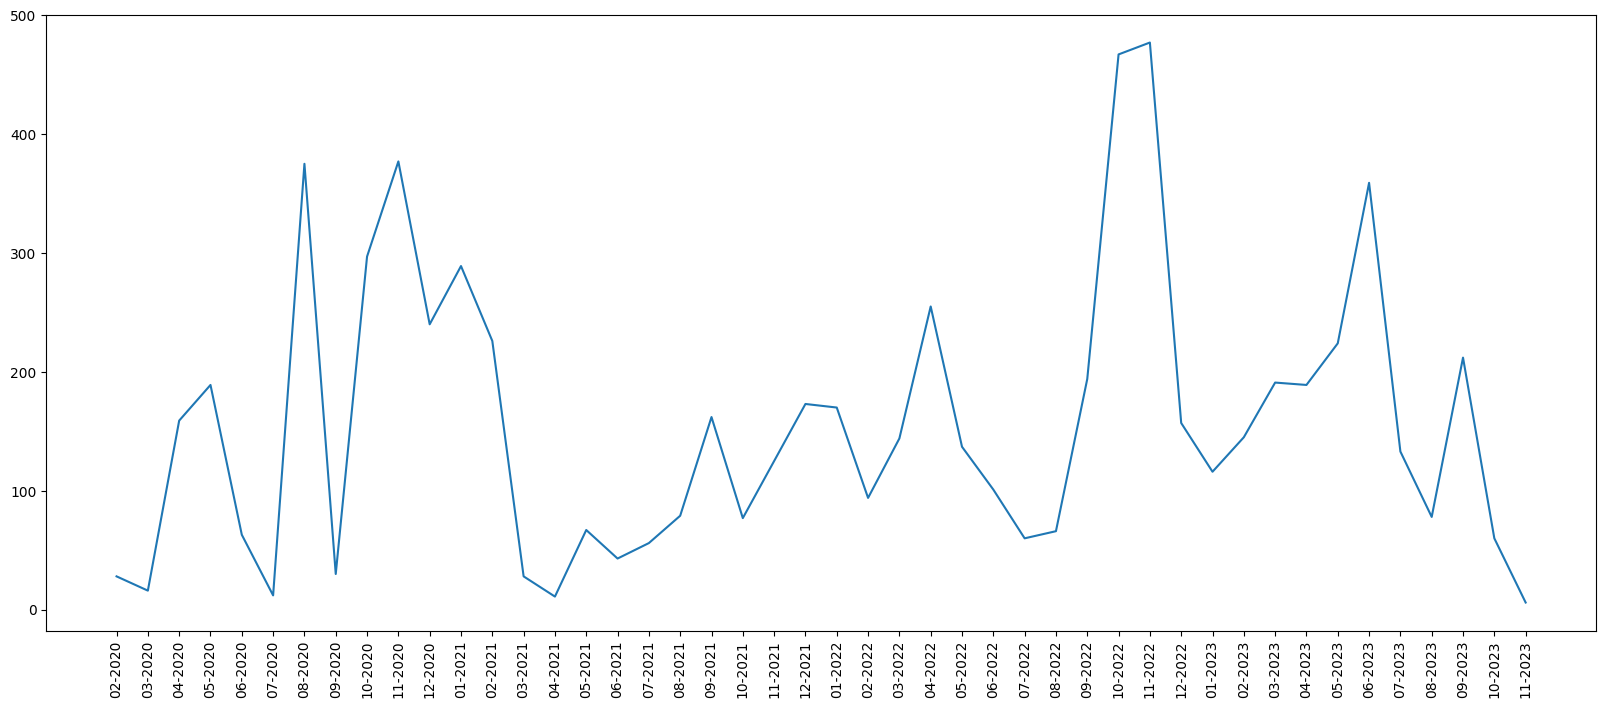

In [60]:
plt.figure(figsize=(20, 8))
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation=90)
plt.show()

In [61]:
df

,day,month,year,hour,minute,user_name,message
0,22,02,2020,1 am,23,system_notification,Messages and calls are end-to-end encrypted. N...
1,22,02,2020,1 am,23,system_notification,"You created group ""SSG""\n"
2,22,02,2020,1 am,25,Shery,<Media omitted>\n
3,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n
4,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n
...,...,...,...,...,...,...,...
7152,01,11,2023,8 pm,46,Ahmad Noob,<Media omitted>\n
7153,01,11,2023,8 pm,50,Muhammad Ali Ijaz,F\n
7154,02,11,2023,12 pm,06,Shery,<Media omitted>\n
7155,02,11,2023,1 pm,57,Muhammad Ali Ijaz,Nice\n


In [62]:
df['date'] = df['day'] + "-" + df['month'] + "-" + df['year']

In [63]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")

In [65]:
df['day_name'] = df['date'].dt.day_name()

In [79]:
df['day_name'].value_counts().sort_index(key=lambda x: x.map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}))

day_name
Monday        814
Tuesday      1335
Wednesday    1025
Thursday     1409
Friday       1010
Saturday      701
Sunday        863
Name: count, dtype: int64

In [77]:
df['month'].value_counts().sort_index()

month
01    575
02    493
03    379
04    614
05    617
06    566
07    261
08    598
09    598
10    901
11    985
12    570
Name: count, dtype: int64

In [80]:
df

,day,month,year,hour,minute,user_name,message,date,day_name
0,22,02,2020,1 am,23,system_notification,Messages and calls are end-to-end encrypted. N...,2020-02-22,Saturday
1,22,02,2020,1 am,23,system_notification,"You created group ""SSG""\n",2020-02-22,Saturday
2,22,02,2020,1 am,25,Shery,<Media omitted>\n,2020-02-22,Saturday
3,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n,2020-02-22,Saturday
4,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n,2020-02-22,Saturday
...,...,...,...,...,...,...,...,...,...
7152,01,11,2023,8 pm,46,Ahmad Noob,<Media omitted>\n,2023-11-01,Wednesday
7153,01,11,2023,8 pm,50,Muhammad Ali Ijaz,F\n,2023-11-01,Wednesday
7154,02,11,2023,12 pm,06,Shery,<Media omitted>\n,2023-11-02,Thursday
7155,02,11,2023,1 pm,57,Muhammad Ali Ijaz,Nice\n,2023-11-02,Thursday


In [113]:
period = []
for hour in df['hour']:
    if '12' in hour:
        period.append(str(hour) + " - " + "1 am/pm")
    # elif '12' in hour:
    #     period.append(str(hour) + " - " + "1 am")
    else:
        period.append(str(hour) + " - " + str(int(hour.split()[0]) + 1) + " " + hour.split()[1])

In [114]:
df['period'] = period

In [115]:
df

,day,month,year,hour,minute,user_name,message,date,day_name,period
0,22,02,2020,1 am,23,system_notification,Messages and calls are end-to-end encrypted. N...,2020-02-22,Saturday,1 am - 2 am
1,22,02,2020,1 am,23,system_notification,"You created group ""SSG""\n",2020-02-22,Saturday,1 am - 2 am
2,22,02,2020,1 am,25,Shery,<Media omitted>\n,2020-02-22,Saturday,1 am - 2 am
3,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n,2020-02-22,Saturday,1 am - 2 am
4,22,02,2020,1 am,28,system_notification,Daenerys Targaryan changed this group's icon\n,2020-02-22,Saturday,1 am - 2 am
...,...,...,...,...,...,...,...,...,...,...
7152,01,11,2023,8 pm,46,Ahmad Noob,<Media omitted>\n,2023-11-01,Wednesday,8 pm - 9 pm
7153,01,11,2023,8 pm,50,Muhammad Ali Ijaz,F\n,2023-11-01,Wednesday,8 pm - 9 pm
7154,02,11,2023,12 pm,06,Shery,<Media omitted>\n,2023-11-02,Thursday,12 pm - 1 am/pm
7155,02,11,2023,1 pm,57,Muhammad Ali Ijaz,Nice\n,2023-11-02,Thursday,1 pm - 2 pm


In [108]:
import seaborn as sns

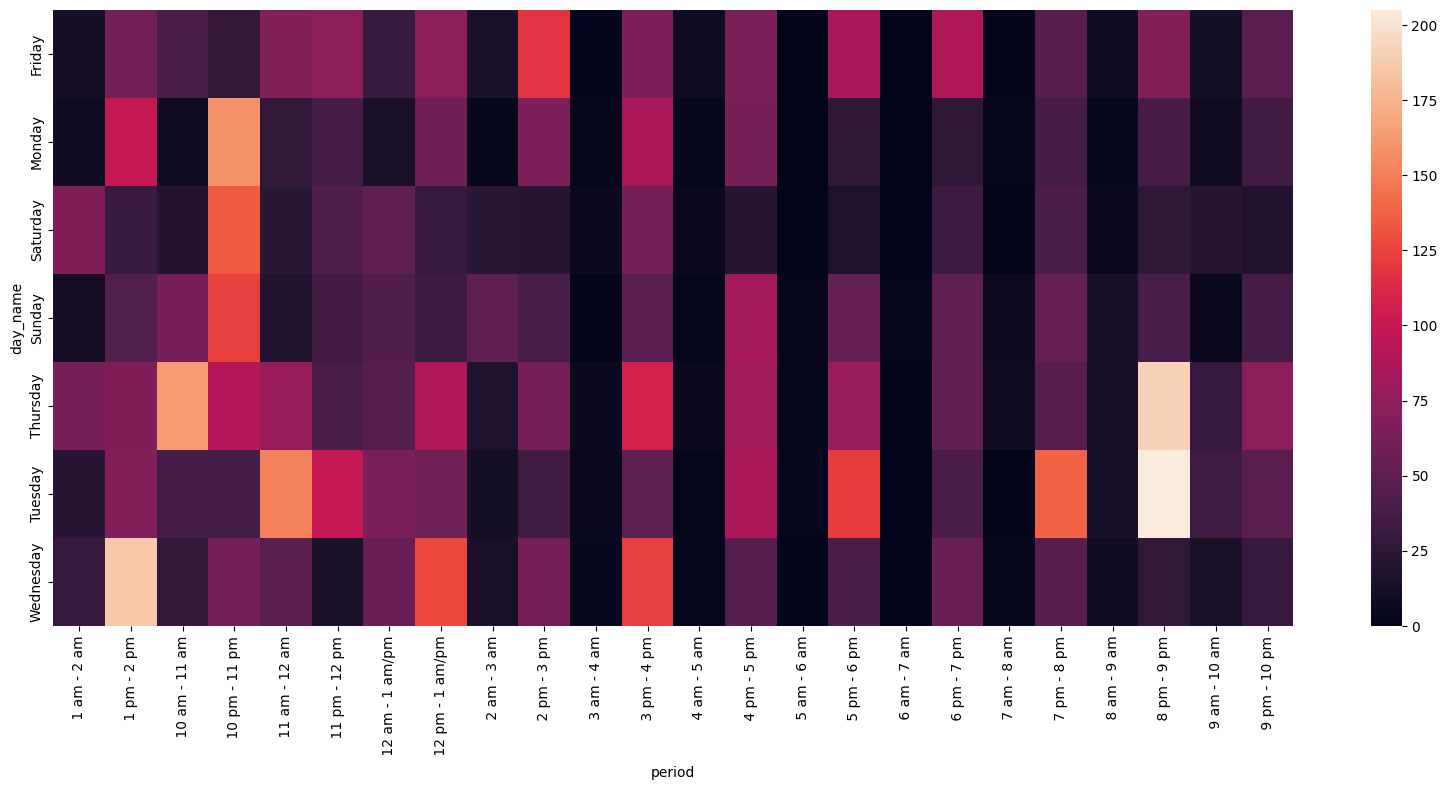

In [109]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.show()

In [116]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,1 am - 2 am,1 pm - 2 pm,10 am - 11 am,10 pm - 11 pm,11 am - 12 am,11 pm - 12 pm,12 am - 1 am/pm,12 pm - 1 am/pm,2 am - 3 am,2 pm - 3 pm,...,5 am - 6 am,5 pm - 6 pm,6 am - 7 am,6 pm - 7 pm,7 am - 8 am,7 pm - 8 pm,8 am - 9 am,8 pm - 9 pm,9 am - 10 am,9 pm - 10 pm
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,12.0,61.0,40.0,28.0,68.0,72.0,31.0,71.0,15.0,117.0,...,1.0,85.0,0.0,89.0,1.0,46.0,9.0,68.0,11.0,48.0
Monday,9.0,100.0,8.0,159.0,27.0,37.0,14.0,58.0,3.0,65.0,...,0.0,26.0,1.0,25.0,3.0,37.0,4.0,39.0,9.0,35.0
Saturday,67.0,31.0,20.0,134.0,23.0,43.0,51.0,30.0,23.0,22.0,...,0.0,16.0,0.0,33.0,1.0,41.0,6.0,25.0,22.0,19.0
Sunday,12.0,44.0,63.0,124.0,19.0,36.0,43.0,33.0,51.0,40.0,...,2.0,53.0,2.0,51.0,7.0,53.0,13.0,40.0,5.0,37.0
Thursday,62.0,67.0,163.0,91.0,77.0,40.0,46.0,90.0,17.0,61.0,...,2.0,79.0,0.0,52.0,9.0,46.0,13.0,191.0,30.0,72.0
Tuesday,22.0,68.0,39.0,38.0,152.0,99.0,64.0,60.0,11.0,35.0,...,2.0,122.0,1.0,41.0,0.0,137.0,13.0,205.0,34.0,47.0
Wednesday,30.0,186.0,28.0,61.0,48.0,15.0,55.0,127.0,14.0,62.0,...,0.0,41.0,0.0,55.0,3.0,46.0,9.0,27.0,14.0,30.0
